In [102]:
# Import libraries
import numpy as np
import pandas as pd

# additional imports
import matplotlib.pyplot as plot
import seaborn
from sklearn.model_selection import train_test_split

In [103]:
%matplotlib inline
RANDOM_STATE = 100
REPETITIONS = 100
# the plots take a long time
# only set to True if you need them
RUN_PLOTS = True

In [104]:
#obtaining the dataset and storing it in the student_data variable to easily process the data using it
student_data = pd.read_csv('C:/Users/ISAAC/student-data.csv')
print("successfully read")

successfully read


In [105]:
n_students = student_data.shape[0]
assert n_students == student_data.passed.count()
n_features = student_data.shape[1] - 1
assert n_features == len(student_data.columns[student_data.columns != 'passed'])
n_passed = sum(student_data.passed.map({'no': 0, 'yes': 1}))
assert n_passed == len(student_data[student_data.passed == 'yes'].passed)
n_failed = n_students - n_passed
grad_rate = n_passed/float(n_students)
print ("Total number of students: {}".format(n_students))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Number of features: {}".format(n_features))
print ("Graduation rate of the class: {:.2f}%".format(100 * grad_rate))

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


In [106]:
passing_rates = student_data.passed.value_counts()/student_data.passed.count()
print(passing_rates)

yes    0.670886
no     0.329114
Name: passed, dtype: float64


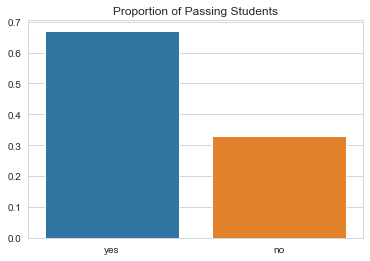

In [107]:
seaborn.set_style('whitegrid')
axe = seaborn.barplot(x=passing_rates.index, y=passing_rates.values)
title = axe.set_title("Proportion of Passing Students")

In [108]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print ("Feature column(s):-\n{}".format(feature_cols))
print ("Target column: {}".format(target_col))

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print ("\nFeature values:-")
print (X_all.head())  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1  

In [109]:
print(len(X_all.columns))

30


In [110]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
y_all = y_all.replace(['yes', 'no'], [1, 0])
print ("Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [111]:
len(X_all.columns)

48

In [112]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size=num_test,
                                                    train_size=num_train,
                                                    random_state=RANDOM_STATE)
assert len(y_train) == 300
assert len(y_test) == 95
print ("Training set: {} samples".format(X_train.shape[0]))
print ("Test set: {} samples".format(X_test.shape[0]))
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


In [113]:
import time

def train_classifier(clf, X_train, y_train, verbose=True):
    if verbose:
        print ("Training {}...".format(clf.__class__.__name__))
    times = []
    for repetition in range(REPETITIONS):
        start = time.time()
        clf.fit(X_train, y_train)
        times.append(time.time() - start)
    if verbose:
        print ("Done!\nTraining time (secs): {:.3f}".format(min(times)))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
my_classifier = LogisticRegression(solver='lbfgs',max_iter=500)

classifiers = [my_classifier,
               RandomForestClassifier(n_estimators = 100),
               KNeighborsClassifier()]
for clf in classifiers:
    # Fit model to training data
    train_classifier(clf, X_train, y_train)  # note: using entire training set here

Training LogisticRegression...
Done!
Training time (secs): 0.062
Training RandomForestClassifier...
Done!
Training time (secs): 0.088
Training KNeighborsClassifier...
Done!
Training time (secs): 0.000


In [114]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target, verbose=True):
    if verbose:
        print ("Predicting labels using {}...".format(clf.__class__.__name__))
    times = []
    scores = []
    for repetition in range(REPETITIONS):
        start = time.time()
        y_pred = clf.predict(features)
        times.append(time.time() - start)
        scores.append(f1_score(target.values, y_pred, pos_label=1))
    if verbose:
        print ("Done!\nPrediction time (secs): {:.3f}".format(min(times)))
    return np.median(scores)

In [115]:
# Predict on test data
for classifier in classifiers:
    print ("F1 score for test set: {}".format(predict_labels(classifier,
                                                            X_test, y_test)))

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.8208955223880597
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.8493150684931507
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.7945205479452054


In [116]:
class ClassifierData(object):
    """A Container for classifire performance data"""
    def __init__(self, classifier, f1_test_score, f1_train_score):
        """
        :param:
         - `classifier`: classifier object (e.g. LogisticRegression())
         - `f1_test_score`: score for the classifier on the test set
         - `f1_train_score`: score for the classifier on the training set
        """
        self.classifier = classifier
        self.f1_test_score = f1_test_score
        self.f1_train_score = f1_train_score
        return

In [117]:
from collections import defaultdict

# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test, verbose=True):
    if verbose:
        print ("------------------------------------------")
        print ("Training set size: {}".format(len(X_train)))
    train_classifier(clf, X_train, y_train, verbose)
    f1_train_score = predict_labels(clf, X_train, y_train, verbose)
    f1_test_score = predict_labels(clf, X_test, y_test, verbose)
    if verbose:
        print ("F1 score for training set: {}".format(f1_train_score))
        print ("F1 score for test set: {}".format(f1_test_score))
    return ClassifierData(clf, f1_test_score, f1_train_score)

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

def train_by_size(sizes = [100, 200, 300], verbose=True):
    classifier_containers = {}
    for classifier in classifiers:
        name = classifier.__class__.__name__
        if verbose:
            print(name)
            print("=" * len(name))
        classifier_containers[name] = defaultdict(lambda: {})
        for size in sizes:
            x_train_sub, y_train_sub = X_train[:size], y_train[:size]
            assert len(x_train_sub) == size
            assert len(y_train_sub) == size
            classifier_data = train_predict(classifier, x_train_sub, y_train_sub, X_test, y_test, verbose)
            classifier_containers[name][size] = classifier_data
        if verbose:
            print('')
    return classifier_containers
_ = train_by_size()

LogisticRegression
------------------------------------------
Training set size: 100
Training LogisticRegression...
Done!
Training time (secs): 0.029
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.8939393939393939
F1 score for test set: 0.6451612903225806
------------------------------------------
Training set size: 200
Training LogisticRegression...
Done!
Training time (secs): 0.047
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.8363636363636363
F1 score for test set: 0.7910447761194029
------------------------------------------
Training set size: 300
Training LogisticRegression...
Done!
Training time (secs): 0.062
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
Pr

In [118]:
if RUN_PLOTS:
    sizes = range(10, 310, 10)
    classifier_containers = train_by_size(sizes=sizes,
                                      verbose=False)

In [119]:
color_map = {'LogisticRegression': 'b',
             'KNeighborsClassifier': 'r',
             'RandomForestClassifier': 'm'}


In [120]:
def plot_scores(containers, which_f1='test', color_map=color_map):
    """
    Plot the f1 scores for the models
    
    :param:
    
     - `containers`: dict of <name><size> : classifier data
     - `which_f1`: 'test' or 'train'
     - `color_map`: dict of <model name> : <color string>
    """
    sizes = sorted(containers['LogisticRegression'].keys())
    figure = plot.figure()
    axe = figure.gca()
    for model in containers:
        scores = [getattr(containers[model][size], 'f1_{0}_score'.format(which_f1)) for size in sizes]
        axe.plot(sizes, scores, label=model, color=color_map[model])
    axe.legend(loc='lower right')
    axe.set_title("{0} Set F1 Scores by Training-Set Size".format(which_f1.capitalize()))
    axe.set_xlabel('Training Set Size')
    axe.set_ylabel('F1 Score')
    axe.set_ylim([0, 1.0])

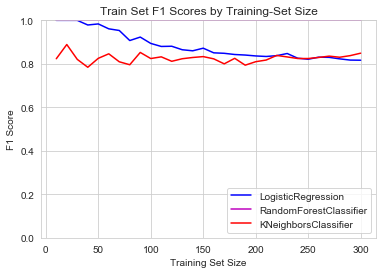

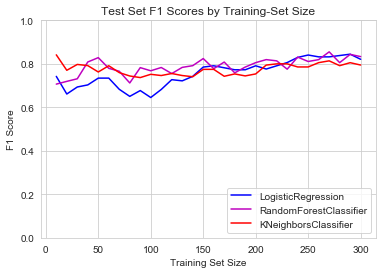

In [121]:
if RUN_PLOTS:
    for f1 in 'train test'.split():
        plot_scores(classifier_containers, f1)

In [122]:
def plot_test_train(containers, model_name, color_map=color_map):
    """
    Plot testing and training plots for each model

    :param:
    
     - `containers`: dict of <model name><size>: classifier data
     - `model_name`: class name of the model
     - `color_map`: dict of <model name> : color string
    """    
    sizes = sorted(containers['LogisticRegression'].keys())
    figure = plot.figure()
    axe = figure.gca()
    test_scores = [containers[model][size].f1_test_score for size in sizes]
    train_scores = [containers[model][size].f1_train_score for size in sizes]
    axe.plot(sizes, test_scores, label="Test", color=color_map[model])
    axe.plot(sizes, train_scores, '--', label="Train", color=color_map[model])
    axe.legend(loc='lower right')
    axe.set_title("{0} F1 Scores by Training-Set Size".format(model))
    axe.set_xlabel('Training Set Size')
    axe.set_ylabel('F1 Score')
    axe.set_ylim([0, 1.0])
    return

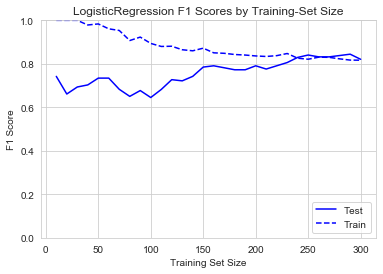

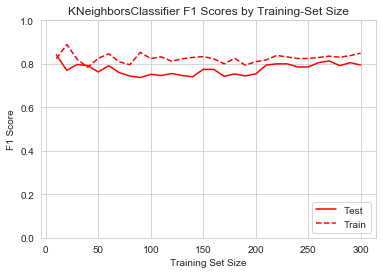

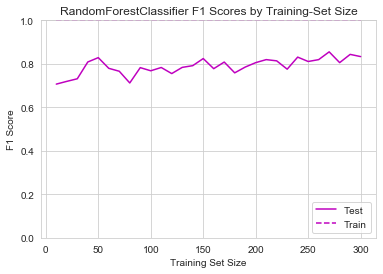

In [123]:
if RUN_PLOTS:
    for model in color_map.keys():
        plot_test_train(classifier_containers, model)

In [124]:
%%latex
P(passed=yes|x) = \frac{1}{1+e^{-weights^T \times attributes}}\\

<IPython.core.display.Latex object>

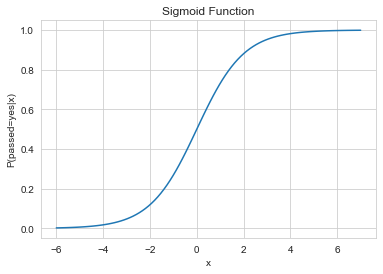

In [125]:
x = np.linspace(-6, 7, 100)
y = 1/(1 + np.exp(-x))
figure = plot.figure()
axe = figure.gca()
axe.plot(x, y)
title = axe.set_title("Sigmoid Function")
axe.set_ylabel(r"P(passed=yes|x)")
label = axe.set_xlabel("x")

In [126]:
%%latex
\textit{probability student passed given age and school} = \frac{1}{1+e^{-(intercept + w_1 \times age + w_2 * school)}}\\

<IPython.core.display.Latex object>

In [127]:

from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score)
passing_ratio = (sum(y_test) +
                 sum(y_train))/float(len(y_test) +
                                     len(y_train))
assert abs(passing_ratio - .67) < .01
model = LogisticRegression()

In [130]:
# python standard library
import warnings

# third party
from sklearn.model_selection import GridSearchCV

parameters = {'penalty': ['l1', 'l2'],
              'C': np.arange(.01, 1., .01),
              'class_weight': [None, 'balanced', {1: passing_ratio, 0: 1 - passing_ratio}]}

In [131]:
grid = GridSearchCV(model, param_grid=parameters, scoring=scorer, cv=10, n_jobs=-1)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    grid.fit(X_train, y_train)

In [132]:
grid.best_params_

{'C': 0.09, 'class_weight': None, 'penalty': 'l1'}

In [134]:
column_names = X_train.columns
coefficients = grid.best_estimator_.coef_[0]
odds = np.exp(coefficients)
sorted_coefficients = sorted((column for column in coefficients), reverse=True)

non_zero_coefficients = [coefficient for coefficient in sorted_coefficients
                         if coefficient != 0]
non_zero_indices = [np.where(coefficients==coefficient)[0][0] for coefficient in non_zero_coefficients]
non_zero_variables = [column_names[index] for index in non_zero_indices]
non_zero_odds = [odds[index] for index in non_zero_indices]
for column, coefficient, odds_ in zip(non_zero_variables, non_zero_coefficients, non_zero_odds):
    print('{0: <10}{1: >5.2f}\t{2: >8.2f}'.format(column, coefficient, odds_))

Medu       0.14	    1.16
age        0.03	    1.03
famrel     0.03	    1.03
Fedu       0.01	    1.01
absences  -0.02	    0.98
goout     -0.07	    0.93
failures  -0.46	    0.63


In [135]:
feature_map = {"school": "student's school",
               "sex": "student's sex",
               "age": "student's age",
               "address": "student's home address type",
               "famsize": "family size",
               "Pstatus": "parent's cohabitation status",
               "Medu": "mother's education",
               "Fedu": "father's education",
               "Mjob": "mother's job",
               "Fjob": "father's job",
               "reason": "reason to choose this school",
               "guardian": "student's guardian",
               "traveltime": "home to school travel time",
               "studytime": "weekly study time",
               "failures": "number of past class failures",
               "schoolsup": "extra educational support",
               "famsup": "family educational support",
               "paid": "extra paid classes within the course subject (Math or Portuguese)",
               "activities": "extra-curricular activities",
               "nursery": "attended nursery school",
               "higher": "wants to take higher education",
               "internet": "Internet access at home",
               "romantic": "within a romantic relationship",
               "famrel": "quality of family relationships",
               "freetime": "free time after school",
               "goout": "going out with friends",
               "Dalc": "workday alcohol consumption",
               "Walc": "weekend alcohol consumption",
               "health": "current health status",
               "absences": "number of school absences",
               "passed": "did the student pass the final exam"}

In [136]:
def plot_counts(x_name, hue='passed'):
    """
    plot counts for a given variable

    :param:
    
     - `x_name`: variable name in student data
     - `hue`: corellating variable
    """
    title = "{0} vs Passing".format(feature_map[x_name].title())
    figure = plot.figure()
    axe = figure.gca()
    axe.set_title(title)
    lines = seaborn.countplot(x=x_name, hue=hue, data=student_data)

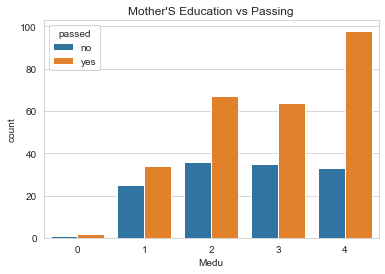

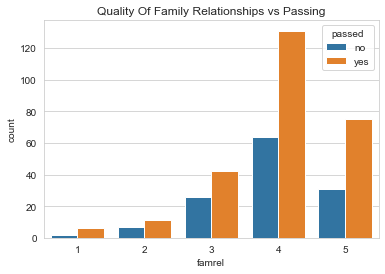

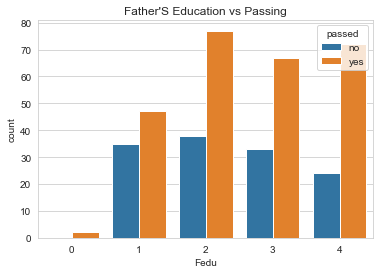

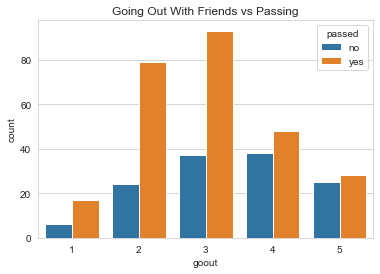

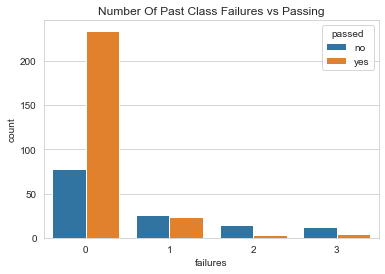

In [137]:
count_plot_variables = [name for name in non_zero_variables
                        if name not in ('age', 'absences')]
for variable in count_plot_variables:
    plot_counts(variable)

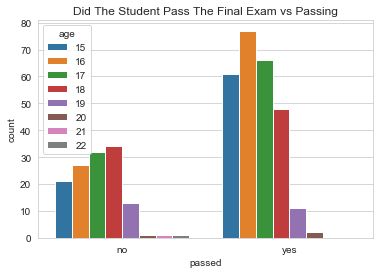

In [138]:
plot_counts('passed', 'age')

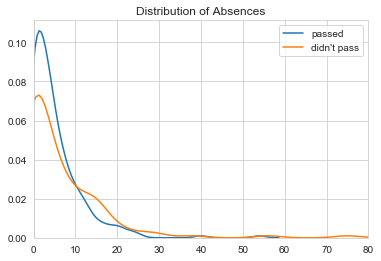

In [139]:
axe = seaborn.kdeplot(student_data[student_data.passed=='yes'].absences, label='passed')
axe.set_title('Distribution of Absences')
axe.set_xlim([0, 80])
axe = seaborn.kdeplot(student_data[student_data.passed=='no'].absences, ax=axe, label="didn't pass")

In [140]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    print("{0:.2f}".format(grid.score(X_test, y_test)))

0.86
